In [675]:
from numba import njit
import numpy as np

In [676]:
debug =False
global maxgenerations 
maxgenerations=1000


In [677]:
def simulation(iterations, p):
    #global generations
    global active
    global gens

    sizes = []
    dur = []
    for i in range(iterations):
        active = 1
        generations = 0
        a, num = branchingprocess(p, generations)
        if debug: print('avalanches',a, num)
        sizes.append(a)
        dur.append(num + 1)
    return sizes, dur

In [678]:
## non c'è una topologia
## è assunto tutti possono attivare tutti

In [679]:
b = 3
a = b
a

3

In [680]:
b = 5
a

3

In [681]:

def branching( p,generations):
    #global generations
    global active
    global gens
   
    
    branches = 2
    for i in range(branches):
        gen = generations
        n = np.random.random()
        if (debug): print( "Evaluating generation " , str(gen))
        if (debug): print( "Evaluating node number " +str(i))
        
        if (n <= p and gen < maxgenerations):
            gen += 1
            active = active + branches
            if (debug): print("{} nodes are created".format(branches))
            if (debug): print("generation number {} is created".format(gen))
            #print(gens)
            #generations = gen
            n, a  = branching(p, gen)
            #print(active)

        else:
            if (debug): print ("This node has died at generation number {}".format(gen))
            gens.append(gen)
            
    
    #print(gen, vec[0])

    if (debug): print("Max generation is " , max (gens))
    return max(gens), active


In [682]:
print([1,3,4,], [2,34])

[1, 3, 4] [2, 34]


In [683]:
 ## pass by reference?

In [684]:

def branchingprocess(p, generations):
    #global generations
    global active
    global gens
    if (debug): print("First generation")

    branches = 2
    gens = []

    if (debug): print( "Generations = ", generations)
    n = np.random.random()
    if (n<=p):
        generations+=1
        active = active + branches

        if (debug): print(" {} nodes are created ".format(branches));
        if (debug): print("Generation number ", generations,  " is created");

        num,a = branching(p,generations)

        generations = num;
        #print(gens)
        #print('durations:',num)
        return a,num
    else:
        if (debug): print( "Avalanche has ended immediately. Generations = ", generations)
        a,num = 1,0
        
        return a,num
        

In [685]:
a,g = simulation(1000,0.5)

Calculating best minimal value for power law fit


1.4950962273187995

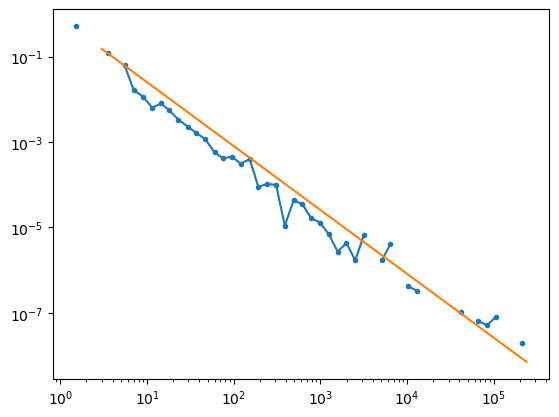

In [688]:
import powerlaw as pwl
pwl.plot_pdf(a,linear_bins = False, marker = '.')
fit = pwl.Fit(a,discrete = True,)

fit.power_law.plot_pdf()
fit.power_law.alpha

In [687]:
fit.power_law.alpha


1.4558098766519771

In [540]:
len(np.unique(g)), len(g)


(213, 5000)

Calculating best minimal value for power law fit


1.666767361466476

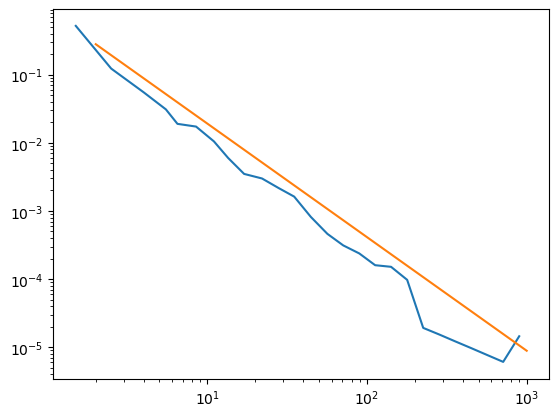

In [690]:
import powerlaw as pwl
pwl.plot_pdf(g,linear_bins = False)
fit = pwl.Fit(g, discrete = True)
fit.power_law.plot_pdf()
fit.power_law.alpha

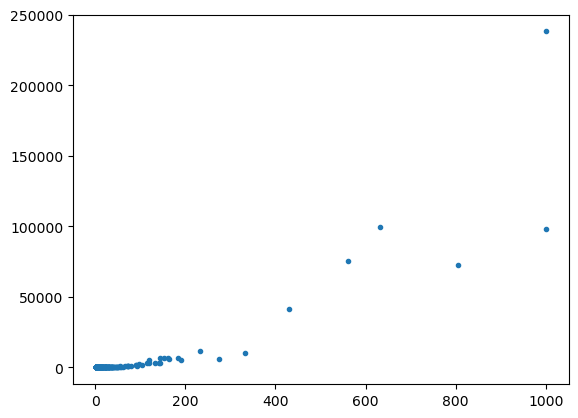

In [692]:
plt.plot(g,a, '.')
x = np.arange(1,500,1)
#plt.loglog(x,x**1, 'b.')

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.4099044735785702 +- 0.10456751126675036
Fit from of average size given duration points: delta =  1.7909670795093966 +- 0.027859571907288327


array([1.4099044735785702, 0.10456751126675036, 1.7909670795093966,
       0.027859571907288327,
       array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
                12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
                23,   24,   25,   26,   28,   29,   30,   31,   32,   33,   35,
                36,   37,   38,   39,   40,   43,   44,   46,   47,   48,   50,
                51,   55,   57,   61,   66,   70,   72,   73,   74,   79,   90,
                91,   93,   98,  103,  116,  119,  120,  134,  142,  145,  152,
               162,  165,  184,  191,  232,  274,  332,  430,  560,  633,  805,
              1001])                                                           ,
       array([1.00000000e+00, 3.00000000e+00, 5.09090909e+00, 7.77272727e+00,
              1.12580645e+01, 1.43684211e+01, 1.89000000e+01, 2.14000000e+01,
              2.78235294e+01, 3.15454545e+01, 3.76000000e+01, 4.55714286e+01,
              3.00000000e+01

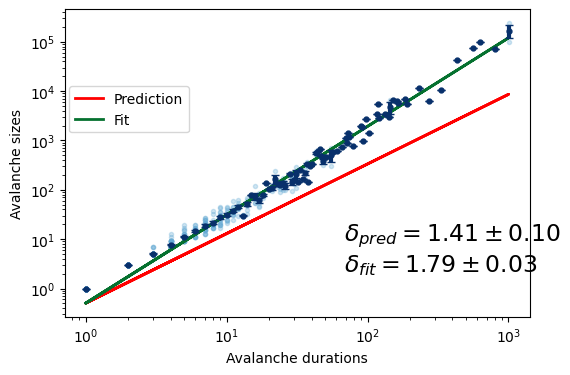

In [693]:
scaling(a,g,maxxminsizes=max(a),maxxmindur=max(g), plotto=True)

In [ ]:
## delta fit è corretto!!